In [4]:
print("""
@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 
""")


@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 



In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
CSI300 = yf.download('000300.SS', start='2017-01-01',
                     end='2023-12-05')
df = CSI300[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


## 尝试使用 time series 进行预测 ❌

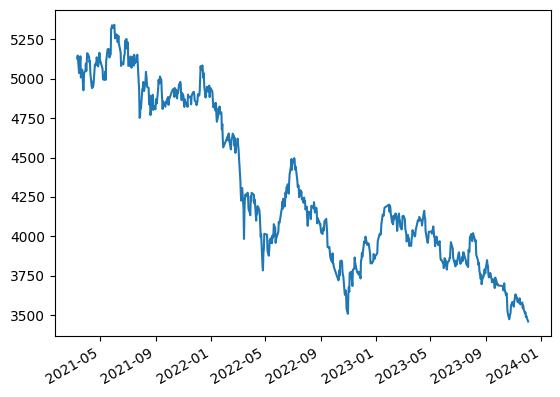

In [7]:
fig, ax = plt.subplots()
ax.plot(df)
fig.autofmt_xdate()

In [8]:
rts = df['Adj Close'].apply(np.log).diff(1).dropna()

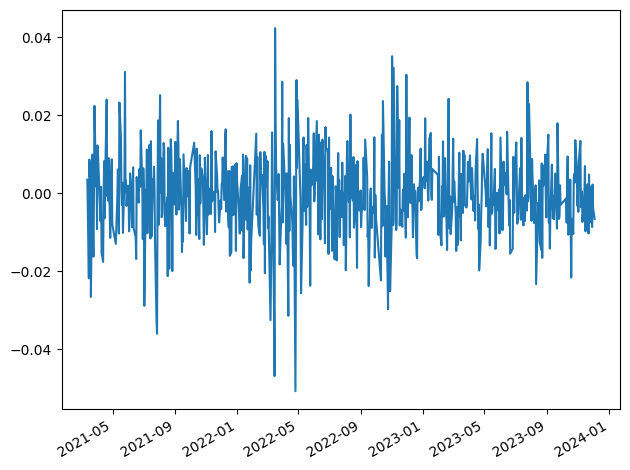

In [9]:
fig, ax = plt.subplots()
ax.plot(rts)
fig.autofmt_xdate()
plt.tight_layout()

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(rts)

(-26.11021808488275,
 0.0,
 0,
 663,
 {'1%': -3.4402516575519346,
  '5%': -2.8659091963995573,
  '10%': -2.569096752341498},
 -4007.2690262999213)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

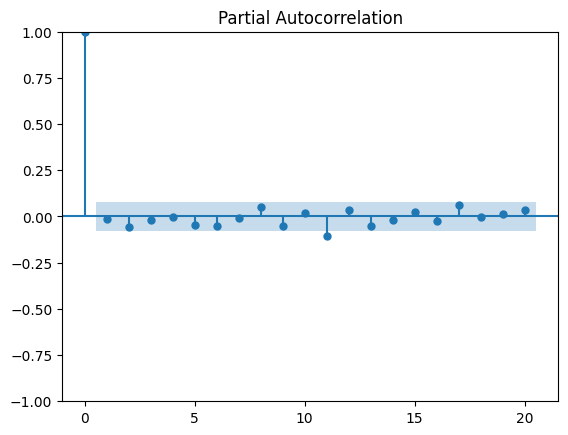

In [12]:
fig = plot_pacf(rts, lags=20)

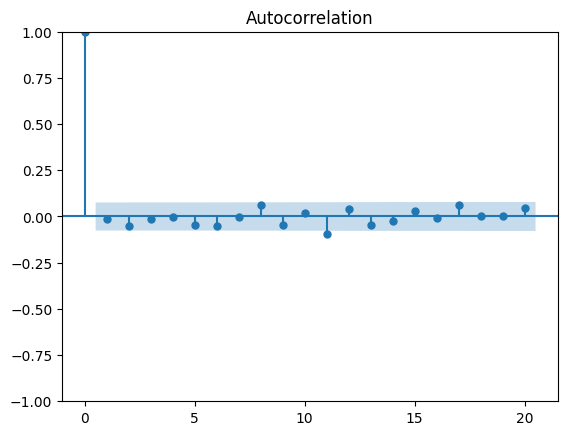

In [13]:
fig = plot_acf(rts, lags=20)

In [14]:
rts

Date
2021-03-12    0.003535
2021-03-15   -0.021773
2021-03-16    0.008664
2021-03-17    0.004224
2021-03-18    0.007988
                ...   
2023-11-28    0.001872
2023-11-29   -0.008623
2023-11-30    0.002259
2023-12-01   -0.003817
2023-12-04   -0.006550
Name: Adj Close, Length: 664, dtype: float64

没法进行时间序列预测，完全是属于噪声

## 尝试使用均线进行预测

In [15]:
df.head()

,Adj Close
Date,
2021-03-11,5128.220215
2021-03-12,5146.379883
2021-03-15,5035.540039
2021-03-16,5079.359863
2021-03-17,5100.859863


In [16]:
df.loc[:, ['log_rtn']] = df['Adj Close'].apply(np.log).diff(1)
df.loc[:, ['sma_5']] = df['Adj Close'].rolling(window=5).mean()
df.loc[:, ['sma_10']] = df['Adj Close'].rolling(window=10).mean()
df.tail()

,Adj Close,log_rtn,sma_5,sma_10
Date,,,,
2023-11-28,3518.520020,0.001872,3534.881982,3557.948022
2023-11-29,3488.310059,-0.008623,3523.660010,3546.054028
2023-11-30,3496.199951,0.002259,3510.595996,3538.438013
2023-12-01,3482.879883,-0.003817,3499.569971,3529.918994
2023-12-04,3460.139893,-0.006550,3489.209961,3518.300977


In [17]:
df.loc[:, ['position']] = (df['Adj Close'] > df['sma_5']).astype(int)
df

,Adj Close,log_rtn,sma_5,sma_10,position
Date,,,,,
2021-03-11,5128.220215,NaN,NaN,NaN,0
2021-03-12,5146.379883,0.003535,NaN,NaN,0
2021-03-15,5035.540039,-0.021773,NaN,NaN,0
2021-03-16,5079.359863,0.008664,NaN,NaN,0
2021-03-17,5100.859863,0.004224,5098.071973,NaN,1
...,...,...,...,...,...
2023-11-28,3518.520020,0.001872,3534.881982,3557.948022,0
2023-11-29,3488.310059,-0.008623,3523.660010,3546.054028,0
2023-11-30,3496.199951,0.002259,3510.595996,3538.438013,0


In [18]:
df = df.dropna()
df.loc[:, 'position_short'] = np.where(df['Adj Close'] > df['sma_5'], 1, -1)
df.head()

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_16248\1821573015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'position_short'] = np.where(df['Adj Close'] > df['sma_5'], 1, -1)


,Adj Close,log_rtn,sma_5,sma_10,position,position_short
Date,,,,,,
2021-03-24,4928.689941,-0.016213,5028.789941,5063.430957,0,-1
2021-03-25,4926.350098,-0.000475,4985.705957,5043.243945,0,-1
2021-03-26,5037.990234,0.022409,4991.886035,5032.404980,1,1
2021-03-29,5046.879883,0.001763,4989.832031,5033.538965,1,1
2021-03-30,5094.729980,0.009436,5006.928027,5035.075977,1,1


In [19]:
df = df.dropna()
df.loc[:, 'position_5>10'] = np.where(df['sma_5'] > df['sma_10'], 1, -1)
df.head()

,Adj Close,log_rtn,sma_5,sma_10,position,position_short,position_5>10
Date,,,,,,,
2021-03-24,4928.689941,-0.016213,5028.789941,5063.430957,0,-1,-1
2021-03-25,4926.350098,-0.000475,4985.705957,5043.243945,0,-1,-1
2021-03-26,5037.990234,0.022409,4991.886035,5032.404980,1,1,-1
2021-03-29,5046.879883,0.001763,4989.832031,5033.538965,1,1,-1
2021-03-30,5094.729980,0.009436,5006.928027,5035.075977,1,1,-1


In [20]:
sum((df['position'] == 1 ) & (df['position'].shift(1) == 0))

87

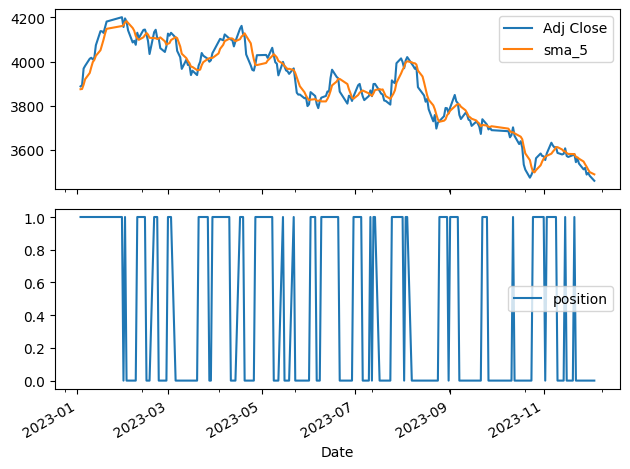

In [21]:
fig, ax = plt.subplots(2, sharex=True)
df.loc['2023', ['Adj Close', 'sma_5']].plot(ax=ax[0])
df.loc['2023', ['position']].plot(ax=ax[1])
fig.autofmt_xdate()
plt.tight_layout()

In [22]:
df.loc[:, ['strategy']] = df['position'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_cum']] = df['strategy'].cumsum().apply(np.exp)
df.loc[:, ['bh_cum']] = df['log_rtn'].cumsum().apply(np.exp)

In [23]:
df.loc[:, ['strategy_short']] = df['position_short'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_short_cum']] = df['strategy_short'].cumsum().apply(np.exp)

In [24]:
df.loc[:, ['strategy_5>10']] = df['position_5>10'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_5>10_cum']] = df['strategy_5>10'].cumsum().apply(np.exp)

In [25]:
df.tail()

,Adj Close,log_rtn,sma_5,sma_10,position,position_short,position_5>10,strategy,strategy_cum,bh_cum,strategy_short,strategy_short_cum,strategy_5>10,strategy_5>10_cum
Date,,,,,,,,,,,,,,
2023-11-28,3518.520020,0.001872,3534.881982,3557.948022,0,-1,-1,0.0,0.846275,0.702405,-0.001872,1.003215,-0.001872,0.776711
2023-11-29,3488.310059,-0.008623,3523.660010,3546.054028,0,-1,-1,-0.0,0.846275,0.696374,0.008623,1.011904,0.008623,0.783438
2023-11-30,3496.199951,0.002259,3510.595996,3538.438013,0,-1,-1,0.0,0.846275,0.697949,-0.002259,1.009620,-0.002259,0.781670
2023-12-01,3482.879883,-0.003817,3499.569971,3529.918994,0,-1,-1,-0.0,0.846275,0.695290,0.003817,1.013481,0.003817,0.784659
2023-12-04,3460.139893,-0.006550,3489.209961,3518.300977,0,-1,-1,-0.0,0.846275,0.690750,0.006550,1.020142,0.006550,0.789816


<Axes: xlabel='Date'>

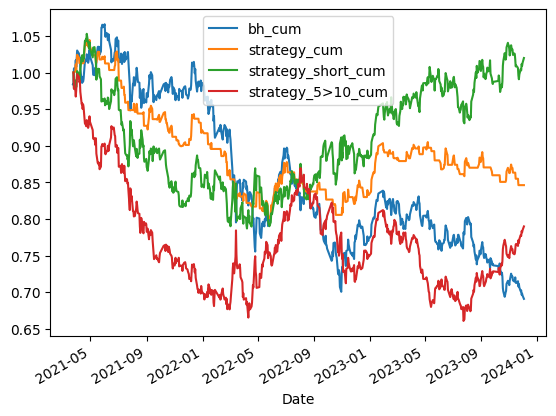

In [26]:
df[['bh_cum', 'strategy_cum', 'strategy_short_cum', 'strategy_5>10_cum']].plot()

长期来看，不做空是可以获得超额收益，但是仍然是要受到市场趋势的影响，做空似乎可以获得超额收益，但是也没有说能挣钱。

用 SMA 5 > SMA 10 的效果更差

最好的效果是：使用 Close > SMA 5 并配合卖空

## 直接使用回归预测

In [27]:
CSI300.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,5128.220215,189600
2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,5146.379883,201000
2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,5035.540039,204200
2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,5079.359863,161400
2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,5100.859863,149200


In [ ]:
# add_original_feature(CSI300, df_new)

In [ ]:
# df_new

,open,open_1,close_1,high_1,low_1,volume_1
Date,,,,,,
2021-03-11,5024.560059,NaN,NaN,NaN,NaN,NaN
2021-03-12,5153.669922,5024.560059,5128.220215,5138.410156,5020.580078,189600.0
2021-03-15,5116.120117,5153.669922,5146.379883,5153.669922,5086.819824,201000.0
2021-03-16,5054.410156,5116.120117,5035.540039,5120.879883,4992.399902,204200.0
2021-03-17,5062.770020,5054.410156,5079.359863,5084.310059,5009.950195,161400.0
...,...,...,...,...,...,...
2023-11-28,3510.659912,3534.439941,3511.939941,3534.439941,3492.860107,99100.0
2023-11-29,3518.879883,3510.659912,3518.520020,3521.050049,3501.110107,89300.0
2023-11-30,3485.520020,3518.879883,3488.310059,3519.199951,3482.239990,98800.0


In [31]:
SSE = yf.download('000001.SS', start='2009-01-01',
                     end='2023-12-05')
df = SSE[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [32]:
SSE.shape

(3622, 6)

In [33]:
df.head()

,Adj Close
Date,
2009-01-05,1880.715942
2009-01-06,1937.145020
2009-01-07,1924.011963
2009-01-08,1878.181030
2009-01-09,1904.860962


In [34]:
SSE.to_csv('../data/sse.csv')

In [35]:
from utils.funcs import generate_features

In [36]:
data = generate_features(SSE)
start_train = '2009-01-01'
end_train = '2022-12-31'
start_test = '2023-01-01'
end_test = '2023-12-31'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
data_test = data.loc[start_test:]
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
scaler = StandardScaler()

X_scales_train = scaler.fit_transform(X_train)
X_scales_test = scaler.transform(X_test)

param_grid = {
    'alpha': [1e-4, 3e-4, 1e-3],
    'eta0': [.01, .03, .1],
}

lr = SGDRegressor(penalty='l2', max_iter=1_000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scales_train, y_train)

# print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scales_test)

print(f'MSE: {mean_squared_error(y_test, predictions_lr):.3f}')

print(f'MAE: {mean_absolute_error(y_test, predictions_lr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_lr):.3f}')

MSE: 635.141
MAE: 19.623
R^2: 0.935


In [37]:
import matplotlib.pyplot as plt

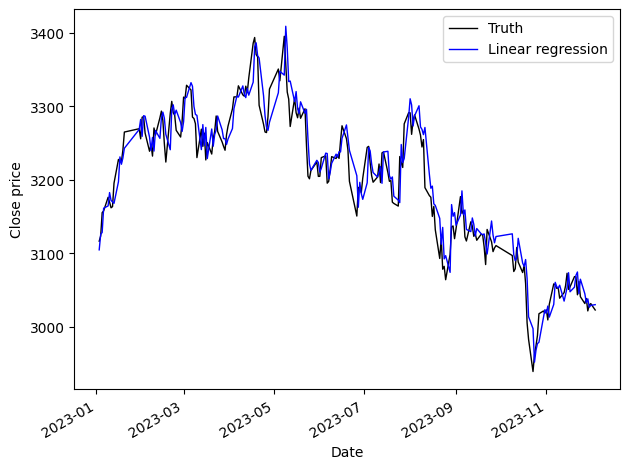

In [38]:
fig, ax =  plt.subplots()
ax.plot(data_test.index, y_test, c='k', label='Truth', linewidth=1)
ax.plot(data_test.index, predictions_lr, c='b', label='Linear regression', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Close price')
ax.legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('../img/000001_lr_png', dpi=500)

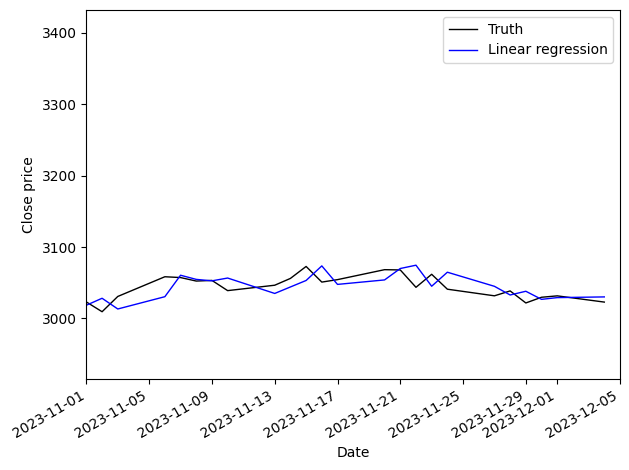

In [39]:
import datetime
fig, ax =  plt.subplots()
ax.plot(data_test.index, y_test, c='k', label='Truth', linewidth=1)
ax.plot(data_test.index, predictions_lr, c='b', label='Linear regression', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Close price')
ax.legend()
ax.set_xlim(datetime.date(2023, 11, 1), datetime.date(2023, 12, 5))
fig.autofmt_xdate()
plt.tight_layout()
# plt.savefig('../img/000001_lr_png', dpi=500)

In [42]:
pd.DataFrame({'truth_prediction': y_test - predictions_lr})

,truth_prediction
0,11.831723
1,-2.195874
2,26.901714
3,-3.709699
4,11.730965
...,...
218,5.686078
219,-16.397419
220,2.923433
221,2.456314


In [44]:
prediction = pd.DataFrame({'truth': y_test, 'prediction': predictions_lr})

In [45]:
prediction

,truth,prediction
0,3116.510010,3104.678286
1,3123.520020,3125.715893
2,3155.219971,3128.318257
3,3157.639893,3161.349592
4,3176.080078,3164.349113
...,...,...
218,3038.550049,3032.863970
219,3021.687012,3038.084431
220,3029.673096,3026.749662
221,3031.635986,3029.179673


In [55]:
truth_rts = 100 * prediction['truth'].apply(np.log).diff(1)

In [56]:
pred_rts = 100 * (prediction['prediction'].apply(np.log) - prediction['truth'].shift(1).apply(np.log))

In [63]:
rts = pd.DataFrame({'truth_rts': truth_rts, 'pred_rts': pred_rts}).dropna(axis=0)

(150.0, 230.0)

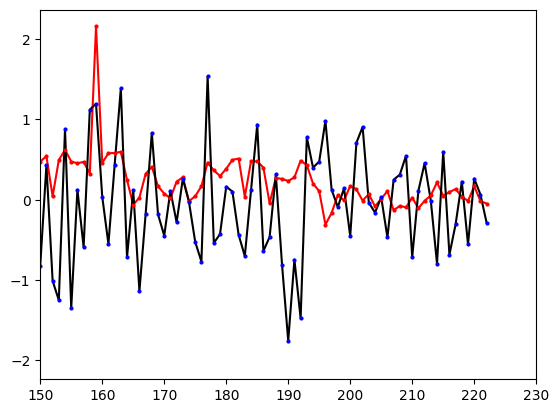

In [84]:
fig, ax = plt.subplots()
# rts.loc[:, ['truth_rts', 'pred_rts']].plot(ax=ax, kind='scatter')
ax.plot(rts.index, rts['pred_rts'], 'r')
ax.plot(rts.index, rts['truth_rts'], 'k')
ax.plot(rts.index, rts['pred_rts'], 'ro', markersize=2)
ax.plot(rts.index, rts['truth_rts'], 'bo', markersize=2)
ax.set_xlim(150, 230)

In [85]:
print(rts)

     truth_rts  pred_rts
1     0.224679  0.294955
2     1.009764  0.153498
3     0.076666  0.194081
4     0.582288  0.212250
5    -0.207075  0.202881
..         ...       ...
218   0.225694  0.038388
219  -0.556516 -0.015325
220   0.263944  0.167404
221   0.064768 -0.016288
222  -0.288112 -0.048564

[222 rows x 2 columns]


In [86]:
rts.sort_values('truth_rts')

,truth_rts,pred_rts
147,-2.027133,0.504591
72,-1.972684,-0.048999
190,-1.758488,0.233471
91,-1.535479,-0.023903
113,-1.489502,0.235743
...,...,...
177,1.535495,0.463397
80,1.798102,0.230291
137,1.825514,0.378853
29,2.036190,0.518744
